In [1]:
!ls './Reports/gender/b5post_pt'

ls: cannot access './Reports/gender/b5post_pt': No such file or directory


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_avg(histories, his_key):
    tmp = []
    for history in histories:
        tmp.append(history[his_key][np.argmin(history['val_loss'])])
    return np.mean(tmp)

def train_val_metrics(histories):
    print('Training: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'loss'), get_avg(histories, 'acc')))
    print('Validation: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'val_loss'), get_avg(histories, 'val_acc')))

In [3]:
def plot_history(history):


    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]

    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')

    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    plt.figure().set_size_inches(12, 4)
    plt.subplot(1,2,1)
    ## Loss    
    for l in loss_list:
        plt.plot(epochs, history[l], 'g', label='Erro de treinamento (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'b', label='Erro de validação (' + str(str(format(history[l][-1],'.5f'))+')'))

    plt.title('Erro')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    
    #plt.gcf().clear()

    ## F2
    plt.subplot(1,2,2)    
    for l in acc_list:
        plt.plot(epochs, history[l], 'g', label='Acurácia de treinamento (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'b', label='Acurácia de validação (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.tight_layout()

    plt.show()


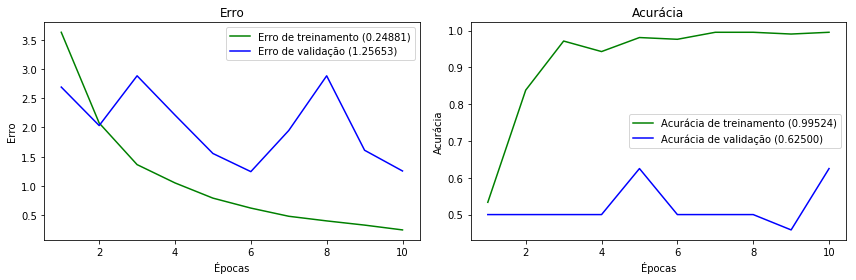

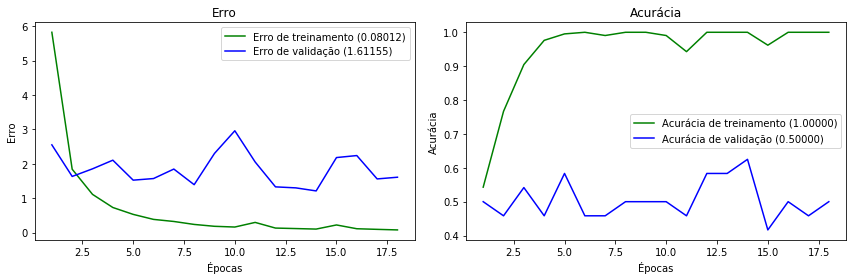

Training: 	0.3633 loss / 0.9881 acc
Validation: 	1.2294 loss / 0.5625 acc


In [96]:
with open('./Reports_grid/it/brmoral_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    train_val_metrics(histories)
    #plot_history(histories[2])

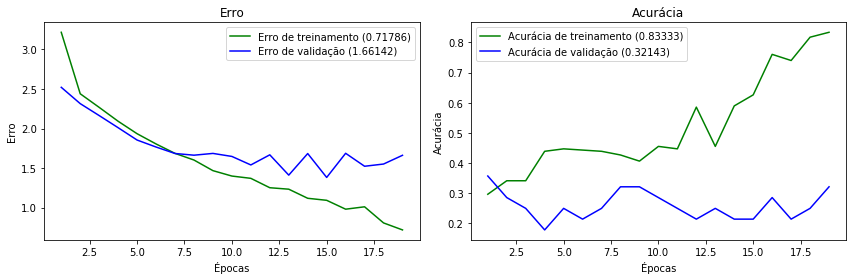

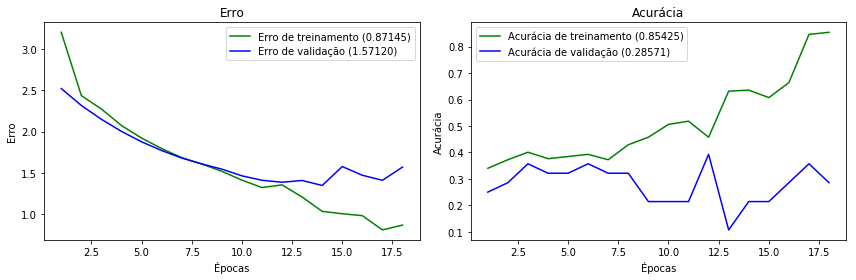

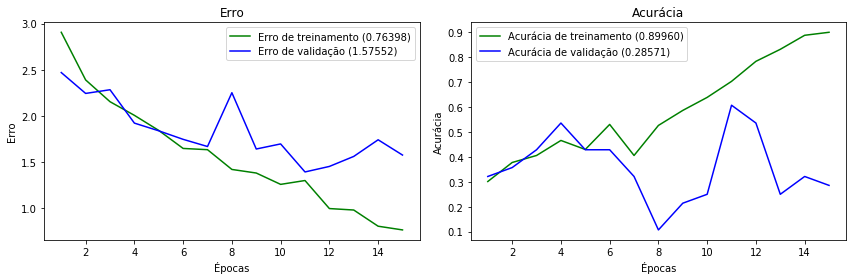

In [5]:
with open('./Reports/age/b5post_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

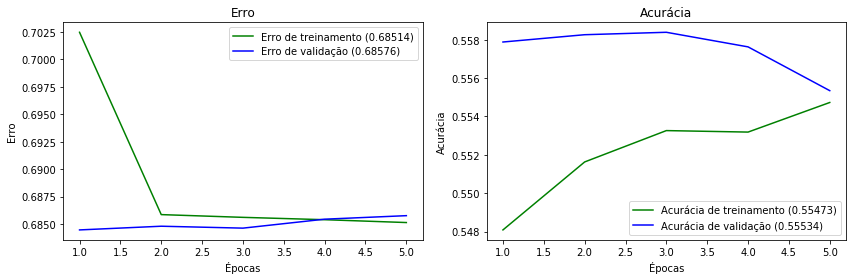

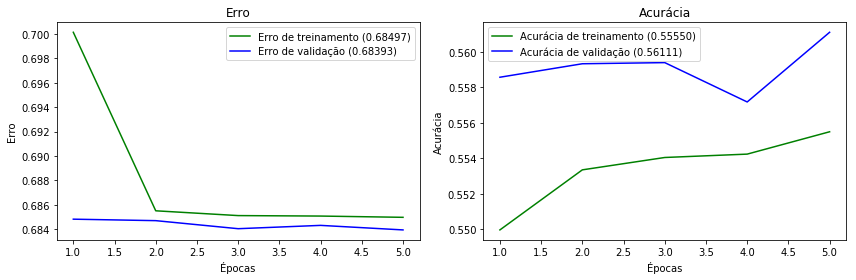

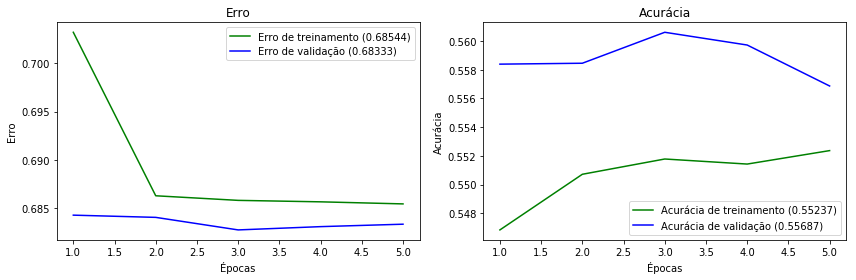

In [6]:
with open('./Reports/gender/pan13_en/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

In [7]:
np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
from Models.functions.datasets import loadTrainTest

ModuleNotFoundError: No module named 'Models'

In [125]:
!ls ./Grid

brmoral__grid.csv


In [2]:
#pan13__grid.csv
import pandas as pd
import ast
def getReports(dataset_name, sort=False, task=None):
    params_keys = ['dropout_rate', 'embedding_dim', 'max_seq_length', 'strides', 'n_classes', 'features_maps', 'epochs', 'batch_size', 'max_num_words', 'kernel_size','pool_size']
    def split_params(x, key):
        x = ast.literal_eval(x)
        return x[key]

    rp = pd.read_csv('./Grid/'+dataset_name+'__grid.csv')
    
    for p in params_keys:    
        rp[p] = rp['params'].apply( split_params, key=p)
    rp = rp.drop(['params'],axis=1)

    rp = rp.filter(['dataset','task','lang','f1','loss','val_loss', 'kernel_size','features_maps','embedding_dim','pool_size','dropout_rate','strides','max_num_words','max_seq_length','batch_size','tunning'])
    if task != None:
        rp = rp[(rp['task'] == task)]        
    if sort == True:
        rp = rp.sort_values(['f1'])
    return rp

### PAN AUTHOR PROFILING TASK RESULTS
#### Gender: 0.59 / Age: 0.64

In [19]:
getReports('pan13', sort=True, task='age')

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
82,pan13,age,en,0.310709,0.949212,0.893291,[8],[50],100,"[3, 3, 3]",0.2,[1],1000,200,2,test channels
26,pan13,age,en,0.313139,1.023932,0.947217,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,[1],10000,411,2,test channels
78,pan13,age,en,0.315586,1.083828,1.029500,[8],[10],100,"[3, 3, 3]",0.2,[1],10000,200,2,test channels
27,pan13,age,en,0.348055,0.981279,0.962133,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,[1],101545,200,2,test channels
79,pan13,age,en,0.348604,0.958841,0.918922,[8],[10],100,"[3, 3, 3]",0.2,[1],10000,408,2,test channels
76,pan13,age,en,0.384240,1.050059,1.058668,[8],[10],100,"[3, 3, 3]",0.2,[1],1000,200,2,test channels
52,pan13,age,en,0.446119,0.966143,0.917388,"[7, 8, 9]","[10, 10, 10]",100,"[3, 3, 3]",0.2,[1],1000,200,2,test channels
31,pan13,age,en,0.461450,0.951910,0.869142,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,[1],10000,407,2,test channels
70,pan13,age,en,0.461670,0.901158,0.844076,[3],[50],100,"[3, 3, 3]",0.2,[1],1000,200,2,test channels
69,pan13,age,en,0.466281,0.936692,0.866324,[3],[10],100,"[3, 3, 3]",0.2,[1],69729,415,2,test channels


### BRMORAL Baseline1 results
#### Gender: 0.628 / Age: 0.404 / Religion: 0.406 / Education: 0.402 / TI: 0.63 / Politics: 0.49

In [98]:
getReports('brmoral', sort=True, task='gender')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
49,brmoral,gender,pt,0.456485,[3],[45],100,NaN,[1],500,302,32,NaN
27,brmoral,gender,pt,0.483852,[1],[40],100,NaN,[1],10,302,32,NaN
12,brmoral,gender,pt,0.503336,[2],[10],100,NaN,[1],6365,10,32,NaN
20,brmoral,gender,pt,0.511989,[1],[10],100,NaN,[1],500,50,32,NaN
38,brmoral,gender,pt,0.512592,[1],[80],100,NaN,[1],10,50,32,NaN
54,brmoral,gender,pt,0.513161,"[7, 8]","[60, 60]",100,NaN,[1],500,302,32,NaN
17,brmoral,gender,pt,0.516512,[1],[10],100,NaN,[1],100,50,32,NaN
43,brmoral,gender,pt,0.519928,[1],[80],100,NaN,[1],500,10,32,NaN
25,brmoral,gender,pt,0.524259,[1],[40],100,NaN,[1],10,10,32,NaN
24,brmoral,gender,pt,0.525746,[1],[10],100,NaN,[1],6447,302,32,NaN


In [99]:
getReports('brmoral', sort=True, task='age')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
1,brmoral,age,pt,0.258686,[3],[10],100,0.25,[1],6664,302,30,NaN
7,brmoral,age,pt,0.332422,[3],[10],100,0.25,[1],6697,302,30,NaN
108,brmoral,age,pt,0.370310,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,test2 embeddings
103,brmoral,age,pt,0.378859,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,embedding_dim
99,brmoral,age,pt,0.387701,"[7, 8]","[50, 50]",10,0.20,[1],500,302,8,embedding_dim
100,brmoral,age,pt,0.405822,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,embedding_dim
101,brmoral,age,pt,0.407934,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,embedding_dim
102,brmoral,age,pt,0.412616,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,embedding_dim


In [100]:
getReports('brmoral', sort=True, task='religion')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
116,brmoral,religion,pt,0.223403,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,create_cnn
114,brmoral,religion,pt,0.284571,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,create_cnn
115,brmoral,religion,pt,0.308832,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,create_cnn
2,brmoral,religion,pt,0.312733,[3],[10],100,0.25,[1],6664,302,30,NaN
8,brmoral,religion,pt,0.334201,[3],[10],100,0.25,[1],6697,302,30,NaN
109,brmoral,religion,pt,0.340353,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,test2 embeddings
111,brmoral,religion,pt,0.342576,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,test2 embeddings
110,brmoral,religion,pt,0.345938,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,test2 embeddings
113,brmoral,religion,pt,0.348166,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,create_cnn
112,brmoral,religion,pt,0.375490,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,test2 embeddings


In [104]:
getReports('brmoral', sort=True, task='it')

,dataset,task,lang,f1,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
10,brmoral,it,pt,0.550296,[3],[10],100,0.25,[1],6697,302,30,NaN
4,brmoral,it,pt,0.555139,[3],[10],100,0.25,[1],6664,302,30,NaN
121,brmoral,it,pt,0.577395,"[7, 8]","[50, 50]",50,0.20,[1],500,302,8,nilc
124,brmoral,it,pt,0.589168,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,nilc
122,brmoral,it,pt,0.612554,"[7, 8]","[50, 50]",50,0.20,[1],500,302,8,nilc
117,brmoral,it,pt,0.618266,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,create_cnn
120,brmoral,it,pt,0.632790,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,create_cnn
123,brmoral,it,pt,0.638848,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,nilc
119,brmoral,it,pt,0.642855,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,create_cnn
125,brmoral,it,pt,0.655969,"[7, 8]","[50, 50]",1000,0.20,[1],500,302,8,nilc


In [108]:
getReports('brmoral', sort=True, task='education')

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
128,brmoral,education,pt,0.199439,0.676651,2.074986,"[7, 8]","[50, 50]",300,0.20,[1],500,302,8,nilc
9,brmoral,education,pt,0.262219,NaN,NaN,[3],[10],100,0.25,[1],6697,302,30,NaN
129,brmoral,education,pt,0.306037,1.742282,1.671864,"[7, 8]","[50, 50]",600,0.20,[1],500,302,8,nilc
126,brmoral,education,pt,0.315701,0.500821,1.432370,"[7, 8]","[50, 50]",50,0.20,[1],500,302,8,nilc
3,brmoral,education,pt,0.344252,NaN,NaN,[3],[10],100,0.25,[1],6664,302,30,NaN
127,brmoral,education,pt,0.367805,0.641655,1.614437,"[7, 8]","[50, 50]",100,0.20,[1],500,302,8,nilc


In [34]:
getReports('brmoral', sort=True, task='politics')

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
11,brmoral,politics,pt,0.287269,NaN,NaN,[3],[10],100,0.25,[1],6697,302,30,NaN
5,brmoral,politics,pt,0.301516,NaN,NaN,[3],[10],100,0.25,[1],6664,302,30,NaN


### b5post RESULTS
#### gender 0.86 / age: 0.57 / religion: 0.44 / it: 0.67

In [84]:
getReports('b5post', sort=True, task='gender')

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
1,b5post,gender,pt,0.448175,0.130644,0.637844,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],100,100,2,NaN
2,b5post,gender,pt,0.473159,0.320358,0.650200,"[7, 8]","[10, 10]",300,"[1, 1]",0.2,[1],100,100,2,NaN
7,b5post,gender,pt,0.486965,0.781289,0.865565,"[7, 8]","[10, 10]",600,"[1, 1]",0.2,[1],1000,100,2,NaN
3,b5post,gender,pt,0.534483,0.280505,0.866117,"[7, 8]","[10, 10]",600,"[1, 1]",0.2,[1],100,100,2,NaN
5,b5post,gender,pt,0.535815,0.582030,0.952094,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],1000,100,2,NaN
0,b5post,gender,pt,0.539001,0.064169,0.290853,"[7, 8]","[10, 10]",50,"[1, 1]",0.2,[1],100,100,2,NaN
8,b5post,gender,pt,0.555211,1.109861,0.891215,"[7, 8]","[10, 10]",1000,"[1, 1]",0.2,[1],1000,100,2,NaN
4,b5post,gender,pt,0.562022,1.582143,1.339808,"[7, 8]","[10, 10]",50,"[1, 1]",0.2,[1],1000,100,2,NaN
6,b5post,gender,pt,0.582261,0.904617,1.022947,"[7, 8]","[10, 10]",300,"[1, 1]",0.2,[1],1000,100,2,NaN
43,b5post,gender,pt,0.646201,0.543783,0.620179,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,1925,2,embeddings


In [85]:
getReports('b5post', sort=True, task='age')

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
11,b5post,age,pt,0.335488,1.544102,1.625291,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],1000,100,2,NaN
25,b5post,age,pt,0.337796,0.997446,1.139607,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,100,2,embeddings
13,b5post,age,pt,0.344443,1.596685,1.707626,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],1000,100,2,NaN
9,b5post,age,pt,0.350201,2.040801,1.884376,"[7, 8]","[10, 10]",50,"[1, 1]",0.2,[1],1000,100,2,NaN
26,b5post,age,pt,0.363576,1.142764,1.122121,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,100,2,embeddings
19,b5post,age,pt,0.384013,1.119454,1.157154,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,100,2,global2 - max-pooling
15,b5post,age,pt,0.396115,1.134804,1.175209,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],1000,100,2,max-pooling
56,b5post,age,pt,0.412084,1.019589,1.215783,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,1957,2,3 channels
52,b5post,age,pt,0.419114,0.895485,0.982432,"[1, 2]","[10, 10]",100,"[10, 10]",0.2,[1],1000,1957,2,kernel
45,b5post,age,pt,0.443285,1.141462,1.040955,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,1925,2,embeddings


In [86]:
getReports('b5post', sort=True, task='religion')

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
28,b5post,religion,pt,0.392209,1.037214,1.125236,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,100,2,embeddings
20,b5post,religion,pt,0.399763,1.053005,1.042521,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,100,2,global2 - max-pooling
29,b5post,religion,pt,0.404868,1.226405,1.250628,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,100,2,embeddings
30,b5post,religion,pt,0.418247,1.110900,1.131990,"[7, 8]","[10, 10]",600,"[10, 10]",0.2,[1],1000,100,2,embeddings
47,b5post,religion,pt,0.435907,1.060347,1.027430,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,1925,2,embeddings
16,b5post,religion,pt,0.442516,1.025129,1.125052,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],1000,100,2,max-pooling
38,b5post,religion,pt,0.448069,1.159564,1.115386,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,2069,2,embeddings
39,b5post,religion,pt,0.469954,0.807163,1.046795,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,2121,2,embeddings
61,b5post,religion,pt,0.470402,0.921378,0.778720,"[3, 4, 5]","[10, 10, 10]",100,"[1, 1, 1]",0.2,"[1, 1, 1]",1000,1957,2,3 channels
46,b5post,religion,pt,0.515247,0.914691,0.952531,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,2058,2,embeddings


In [81]:
getReports('b5post', sort=True, task='it')

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
10,b5post,it,pt,0.502234,0.859073,1.096351,"[7, 8]","[10, 10]",50,"[1, 1]",0.2,[1],1000,100,2,NaN
12,b5post,it,pt,0.510822,0.680978,1.102087,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],1000,100,2,NaN
14,b5post,it,pt,0.516352,0.953726,1.290617,"[7, 8]","[10, 10]",100,"[1, 1]",0.2,[1],1000,100,2,NaN
32,b5post,it,pt,0.600857,0.684285,0.698810,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,100,2,embeddings
33,b5post,it,pt,0.619513,0.750070,0.756228,"[7, 8]","[10, 10]",600,"[10, 10]",0.2,[1],1000,100,2,embeddings
21,b5post,it,pt,0.621050,0.685692,0.703516,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,100,2,global2 - max-pooling
48,b5post,it,pt,0.633634,0.421643,0.519478,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,2058,2,embeddings
49,b5post,it,pt,0.641852,0.709649,0.685212,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,1925,2,embeddings
31,b5post,it,pt,0.657306,0.786700,0.765654,"[7, 8]","[10, 10]",100,"[10, 10]",0.2,[1],1000,100,2,embeddings
41,b5post,it,pt,0.661718,0.553975,0.650211,"[7, 8]","[10, 10]",300,"[10, 10]",0.2,[1],1000,2121,2,embeddings


### e-Sic RESULTS
#### gender: 0.57 / age: 0.58 / education: 0.57 / profession: 0.53 / region: 0.60 / city: 0.70

In [102]:
getReports('esic', sort=True, task='gender')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
51,esic,gender,pt,0.587091,0.722815,0.749650,"[7, 8, 9]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,65,2,3 channels
38,esic,gender,pt,0.597894,0.707371,0.704554,"[3, 4]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6923,79,2,3 channels
28,esic,gender,pt,0.606750,0.580891,0.698066,[3],[40],100,"[1, 1, 1]",0.2,"[1, 1, 1]",1000,102,2,3 channels
42,esic,gender,pt,0.609560,0.654652,0.678053,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",8120,91,2,3 channels
48,esic,gender,pt,0.612176,0.583149,0.758747,"[3, 4, 5]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6639,94,2,3 channels
31,esic,gender,pt,0.612341,0.694655,0.737753,[3],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,65,2,3 channels
46,esic,gender,pt,0.621566,0.658149,0.735229,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6907,74,2,3 channels
52,esic,gender,pt,0.621898,0.759052,0.762565,"[7, 8, 9]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",7137,89,2,3 channels
32,esic,gender,pt,0.629122,0.533877,0.720169,[3],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",7901,75,2,3 channels
47,esic,gender,pt,0.665670,0.632565,0.719228,"[3, 4, 5]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,111,2,3 channels


In [103]:
getReports('esic', sort=True, task='age')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
70,esic,age,pt,0.427271,1.214884,1.204090,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6907,74,2,3 channels
54,esic,age,pt,0.430256,1.065902,1.083972,[3],[10],100,"[3, 3, 3]",0.2,"[1, 1, 1]",6251,71,2,3 channels
59,esic,age,pt,0.432919,1.148483,1.222463,[7],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,92,2,3 channels
67,esic,age,pt,0.432998,1.238906,1.284840,"[7, 8]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,70,2,3 channels
66,esic,age,pt,0.433767,1.042816,1.168085,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",8120,91,2,3 channels
60,esic,age,pt,0.441942,1.216825,1.229365,[7],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",6496,66,2,3 channels
71,esic,age,pt,0.443142,1.020301,1.140621,"[3, 4, 5]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,111,2,3 channels
61,esic,age,pt,0.445914,1.100253,1.152469,"[3, 4]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,84,2,3 channels
64,esic,age,pt,0.448469,1.176864,1.261947,"[3, 4]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",7012,81,2,3 channels
74,esic,age,pt,0.460495,1.145978,1.167068,"[7, 8, 9]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6743,71,2,3 channels


In [93]:
getReports('esic', sort=True, task='education')[-5:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
12,esic,education,pt,0.443510,0.948801,1.250959,"[3, 4]","[40, 40]",100,"[1, 1, 1]",0.2,"[1, 1, 1]",1000,84,2,3 channels
14,esic,education,pt,0.451968,1.017229,1.238482,"[7, 8]","[10, 10]",100,"[1, 1, 1]",0.2,"[1, 1, 1]",1000,89,2,3 channels
11,esic,education,pt,0.452221,0.934839,1.227185,"[3, 4]","[10, 10]",100,"[1, 1, 1]",0.2,"[1, 1, 1]",7199,72,2,3 channels
2,esic,education,pt,0.458740,0.921280,1.081379,[3],[10],100,"[1, 1, 1]",0.2,"[1, 1, 1]",1000,111,2,3 channels
15,esic,education,pt,0.465185,1.068069,1.241678,"[7, 8]","[10, 10]",100,"[1, 1, 1]",0.2,"[1, 1, 1]",7847,88,2,3 channels


In [100]:
getReports('esic', sort=True, task='profession')[-5:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
119,esic,profession,pt,0.357164,1.454229,1.484295,"[3, 4, 5]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,111,2,3 channels
104,esic,profession,pt,0.362437,1.420411,1.511458,[3],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",7901,75,2,3 channels
122,esic,profession,pt,0.364247,1.366043,1.469309,"[7, 8, 9]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6743,71,2,3 channels
110,esic,profession,pt,0.370942,1.348103,1.423916,"[3, 4]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6923,79,2,3 channels
118,esic,profession,pt,0.372119,1.397682,1.451005,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6907,74,2,3 channels


In [107]:
getReports('esic', sort=True, task='region')[-5:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
142,esic,region,pt,0.279119,1.596873,1.587852,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6907,74,2,3 channels
136,esic,region,pt,0.289853,1.529364,1.560930,"[3, 4]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",7012,81,2,3 channels
128,esic,region,pt,0.291591,1.588282,1.593869,[3],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",7901,75,2,3 channels
133,esic,region,pt,0.292730,1.540026,1.514119,"[3, 4]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,84,2,3 channels
135,esic,region,pt,0.298573,1.570667,1.654591,"[3, 4]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,116,2,3 channels


In [3]:
getReports('esic', sort=True, task='city')[-5:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
159,esic,city,pt,0.564191,0.723761,0.795197,"[3, 4]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,116,2,3 channels
162,esic,city,pt,0.566569,0.777795,0.745692,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",8120,91,2,3 channels
153,esic,city,pt,0.567893,0.630706,0.654323,[7],[10],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,95,2,3 channels
155,esic,city,pt,0.591485,0.736834,0.727701,[7],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,92,2,3 channels
166,esic,city,pt,0.603171,0.755501,0.763184,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",6907,74,2,3 channels


In [9]:
getReports('brblogset', sort=True,task='age')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
52,brblogset,age,pt,0.425416,0.940729,1.028100,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3298,2,3 channels
43,brblogset,age,pt,0.425733,1.103986,1.105215,"[7, 8, 9]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",78722,3488,2,3 channels
67,brblogset,age,pt,0.426025,1.115560,1.108344,"[7, 8, 9]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",10000,3590,2,3 channels
40,brblogset,age,pt,0.428329,1.093782,1.096700,"[7, 8, 9]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,4357,2,3 channels
41,brblogset,age,pt,0.429319,1.106717,1.101726,"[7, 8, 9]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",85995,3443,2,3 channels
87,brblogset,age,pt,0.431568,1.018683,1.064179,[2],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",10000,3214,2,3 channels
38,brblogset,age,pt,0.436890,1.060538,1.074856,"[7, 8]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3337,2,3 channels
46,brblogset,age,pt,0.439764,1.091692,1.099941,"[3, 4]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3392,2,3 channels
27,brblogset,age,pt,0.440853,1.037971,1.066611,[7],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3192,2,3 channels
60,brblogset,age,pt,0.446305,1.087552,1.078819,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3481,2,3 channels


In [10]:
getReports('brblogset', sort=True,task='gender')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
12,brblogset,gender,pt,0.627491,0.793662,0.708255,"[7, 8]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3348,2,3 channels
0,brblogset,gender,pt,0.637011,0.588169,0.626748,[3],[10],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3444,2,3 channels
9,brblogset,gender,pt,0.647667,0.514030,0.595522,"[3, 4]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",122179,3927,2,3 channels
5,brblogset,gender,pt,0.666428,0.580889,0.632625,[7],[10],100,"[3, 3, 3]",0.2,"[1, 1, 1]",133652,3352,2,3 channels
3,brblogset,gender,pt,0.683665,0.440224,0.604582,[3],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",118937,3503,2,3 channels
6,brblogset,gender,pt,0.686222,0.831787,0.710043,[7],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3248,2,3 channels
1,brblogset,gender,pt,0.693917,0.464546,0.573300,[3],[10],100,"[3, 3, 3]",0.2,"[1, 1, 1]",148873,3407,2,3 channels
8,brblogset,gender,pt,0.698008,0.639000,0.634858,"[3, 4]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3182,2,3 channels
2,brblogset,gender,pt,0.712064,0.549661,0.631382,[3],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3349,2,3 channels
10,brblogset,gender,pt,0.723986,0.412746,0.495024,"[3, 4]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3504,2,3 channels


In [11]:
getReports('brblogset', sort=True,task='education')[-10:]

,dataset,task,lang,f1,loss,val_loss,kernel_size,features_maps,embedding_dim,pool_size,dropout_rate,strides,max_num_words,max_seq_length,batch_size,tunning
114,brblogset,education,pt,0.251624,1.312221,1.328861,"[2, 3, 4]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3629,2,3 channels
104,brblogset,education,pt,0.254093,1.383918,1.384600,"[2, 3]","[10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3689,2,3 channels
121,brblogset,education,pt,0.255638,1.380151,1.378164,[3],[10],100,"[3, 3, 3]",0.2,"[1, 1, 1]",10000,3294,2,3 channels
115,brblogset,education,pt,0.268341,1.392949,1.387931,"[2, 3, 4]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",10000,3561,2,3 channels
107,brblogset,education,pt,0.270095,1.366345,1.352907,"[2, 3]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",10000,3722,2,3 channels
98,brblogset,education,pt,0.271689,1.393272,1.388390,"[7, 8, 9]","[40, 40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3301,2,3 channels
95,brblogset,education,pt,0.275648,1.391780,1.388741,"[7, 8]","[40, 40]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",10000,3425,2,3 channels
108,brblogset,education,pt,0.275731,1.314030,1.354934,"[3, 4, 5]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3531,2,3 channels
122,brblogset,education,pt,0.278145,1.377594,1.376977,[3],[40],100,"[3, 3, 3]",0.2,"[1, 1, 1]",1000,3608,2,3 channels
97,brblogset,education,pt,0.285980,1.376845,1.377823,"[7, 8, 9]","[10, 10, 10]",100,"[3, 3, 3]",0.2,"[1, 1, 1]",10000,3276,2,3 channels
